# LAB4 - MỘT SỐ THUẬT TOÁN CƠ BẢN CỦA HỌC MÁY

### 1. LINEAR REGRESSION

In [1]:
# BIẾT: HỒI QUY TUYẾN TÍNH LÀ DỰ ĐOÁN GIÁ TRỊ LIÊN TỤC DỰA TRÊN MỘT HOẶC NHIỀU BIẾN ĐỘC LẬP

In [2]:
# SỬ DỤNG HỒI QUY TUYẾN TÍNH ĐỂ DỰ ĐOÁN GIÁ NHÀ THÔNG QUA BỘ DỮ LIỆU BOSTON HOUSING

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [4]:
boston = fetch_california_housing()
x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# Xây dựng và huấn luyện mô hình

In [7]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
# Dự đoán và đánh giá
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(r2,mse)

0.5757877060324511 0.555891598695244


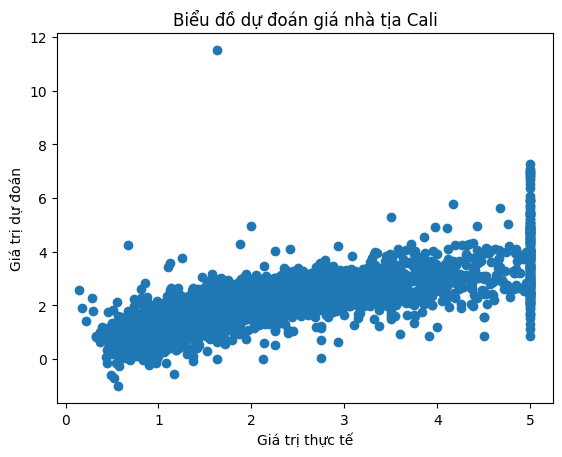

In [9]:
# Vẽ biểu đồ
plt.scatter(y_test, y_pred)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('Biểu đồ dự đoán giá nhà tịa Cali')
plt.show()

In [10]:
df = pd.read_csv('lab1data1.txt', header=None, names=['X', 'y'])

In [11]:
df.head()

,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [12]:
X = df['X'].values.reshape(-1, 1)
y = df['y'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Dự đoán và đánh giá
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(r2,mse)

0.500344113338578 15.709362447765187


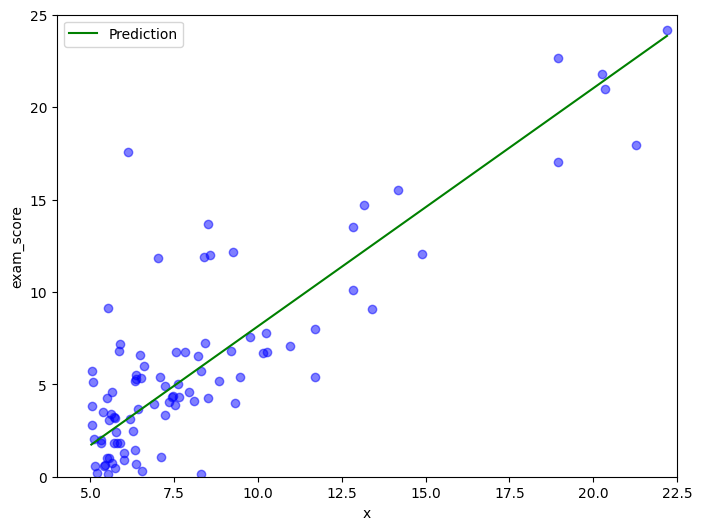

In [16]:
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5) 
plt.plot(X_line, y_line, color='green', label='Prediction')

plt.xlabel('x')
plt.ylabel('exam_score')
plt.legend()

plt.xlim(4, 22.5)
plt.ylim(0, 25)

plt.show()

In [17]:
# Hồi quy logistic
# Phân loại nhị nhân hoặc đa lớp dựa trên các đặc trưng

In [18]:
# Xây dựng mô hình Logistics để phân loại nhị phân trong dữ liệu breast cancer
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns

In [19]:
data = load_breast_cancer()
X = data.data
y = data.target

In [20]:
# Chia tập dữ liệu thành tập huấn luyện 75% và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
# Xây dựng và huấn luyện mô hình
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Dự đoán và đánh giá mô hình
print('Train accuracy score: ', model.score(X_train,y_train))
print('Test accuracy  score: ', model.score(X_test,y_test))
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
recall = recall_score(y_test,y_pred,average='macro')
f1 = f1_score(y_test,y_pred)
print(f'Score: {score} Recall: {recall}, Precision: {precision}, F1: {f1}')

Train accuracy score:  0.9436619718309859
Test accuracy  score:  0.965034965034965
Score: 0.965034965034965 Recall: 0.9609862671660424, Precision: 0.9644654088050315, F1: 0.9720670391061452


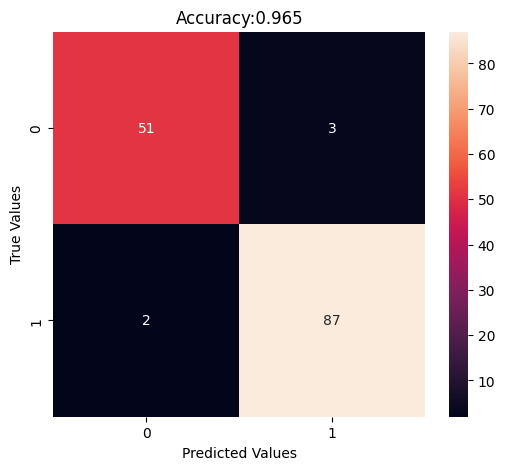

In [23]:
# Trực quan hóa dữ liệu
cm = confusion_matrix(y_test, model.predict(X_test))
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Accuracy:{0:.3f}'.format(score))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [24]:
# Phân cụm

In [25]:
# Nhóm các đối tượng có đặc điểm tương đồng mà không cần gán nhãn

In [26]:
# Sử dụng data iris để phân cụm
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [27]:
iris = datasets.load_iris()
X = iris.data # có 4 đạc trưng
y = iris.target # nhãn để so sánh

In [28]:
# Áp dụng KMean với số cụm là 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_Kmeans = kmeans.predict(X)

In [29]:
# Sử dụng PCA để giảm chiều (Về nhà giải thích ở bài tập về nhà)
pca = PCA(n_components=2) # Giảm xuống còn 2 chiều
X_pca = pca.fit_transform(X)

In [30]:
#Giải thích PCA 
#PCA là một kỹ thuật giảm chiều dữ liệu, giúp trích xuất các thành phần quan trọng nhất của dữ liệu trong không gian có số chiều thấp hơn
# Nó giữ lại tối đa lượng thông tin có thể, đồng thời giảm nhiễu và giúp mô hình chạy nhanh hơn

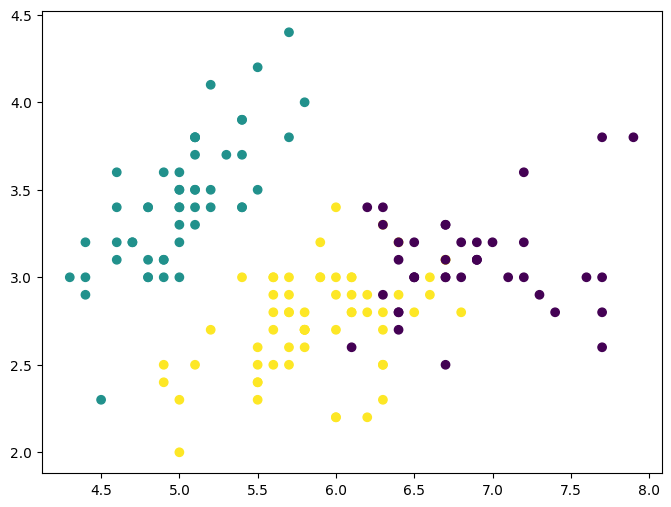

In [31]:
# Trực quan hóa kết quả
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1], c = y_Kmeans)
plt.show()

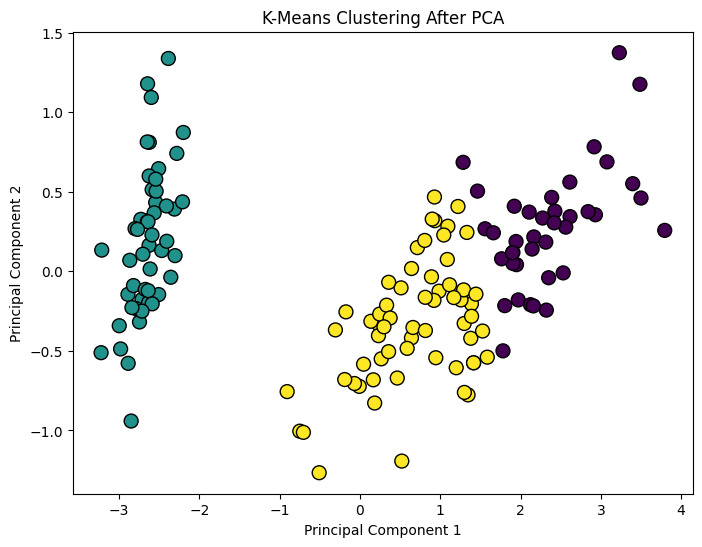

In [32]:
# Trực quan hóa kết quả sau khi áp dụng PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_Kmeans, cmap='viridis', edgecolors='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering After PCA')
plt.show()

In [33]:
#BTVN:

# 1. Cho tập dữ liệu dự đoán bệnh tim bằng hồi quy logistic

# 2. Ứng dụng thuật toán Kmean cho tập dữ liệu customer data, you can get in kanggle

# 3. Tìm hiểu về ma trận nhầm lẫn và đánh giá độ chính xác trên các bài tập lớn

#Deadlime 23h59p59s ngày 28/02/2025 

# 1. Cho tập dữ liệu dự đoán bệnh tim bằng hồi quy logistic


In [34]:
data = pd.read_csv("framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [35]:
#Kiểm tra trùng lặp dữ liệu
data.duplicated().any()

False

In [36]:
# Kiểm tra dữ liệu có bị null hay không
data.isnull().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [37]:
# Xem cột 
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

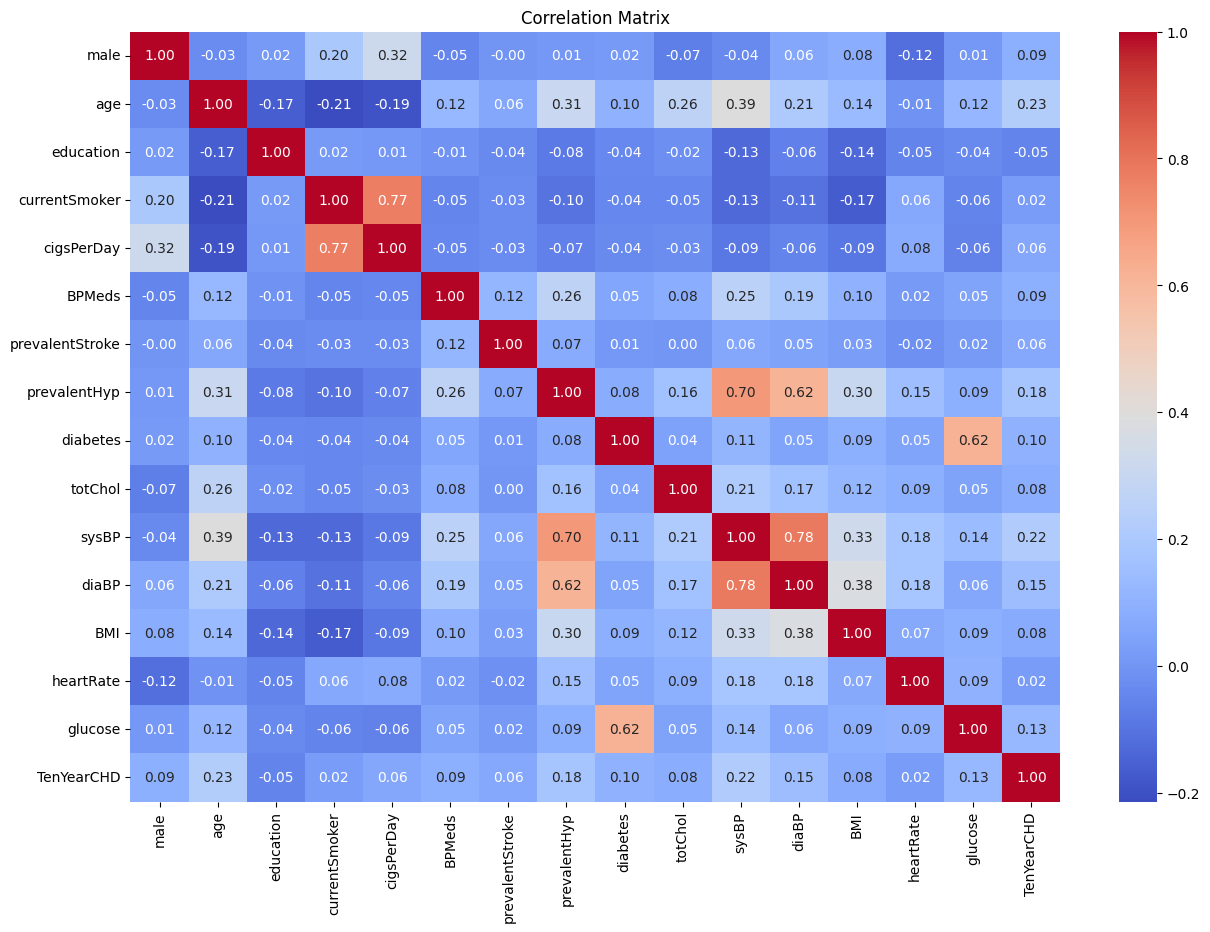

In [38]:
#Tính tương quan giữa các biến
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [39]:
data = data.dropna()

In [40]:
#Chia dữ liệu thành tập X và tập y
X = data.drop(columns=['TenYearCHD'])
y = data['TenYearCHD']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Xây dựng và huấn luyện mô hình
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [43]:
# Dự đoán và đánh giá mô hình
print('Train accuracy score: ', model.score(X_train,y_train))
print('Test accuracy  score: ', model.score(X_test,y_test))

y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
recall = recall_score(y_test,y_pred,average='macro')
f1 = f1_score(y_test,y_pred)
print(f'Score: {score} Recall: {recall}, Precision: {precision}, F1: {f1}')

Train accuracy score:  0.8553351573187414
Test accuracy  score:  0.8333333333333334
Score: 0.8333333333333334 Recall: 0.5360655737704918, Precision: 0.671830985915493, F1: 0.1527777777777778


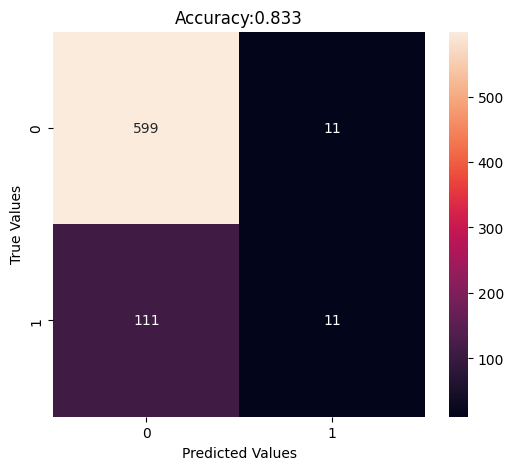

In [44]:
# Trực quan hóa dữ liệu
cm = confusion_matrix(y_test, model.predict(X_test))
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Accuracy:{0:.3f}'.format(score))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

# 2. Ứng dụng thuật toán Kmean cho tập dữ liệu customer data, you can get in kanggle


In [45]:
data2 = pd.read_csv("Mall_Customers.csv")
data2.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
data2.drop(["CustomerID"], axis = 1, inplace=True)

In [47]:
X = data2[['Annual_Income_(k$)', 'Spending_Score']]

In [48]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_Kmeans = kmeans.predict(X)

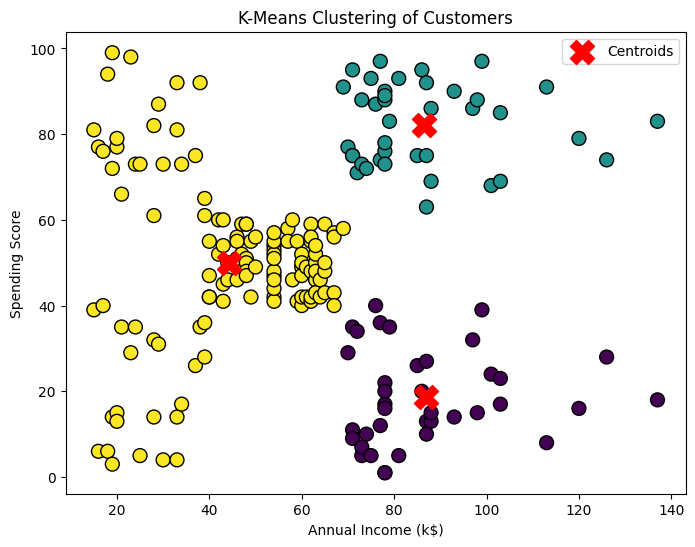

In [49]:
data2['Cluster'] = y_Kmeans

plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_Kmeans, cmap='viridis', edgecolors='k', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering of Customers')
plt.legend()
plt.show()

# 3. Tìm hiểu về ma trận nhầm lẫn và đánh giá độ chính xác trên các bài tập lớn


### 3.1. Ma trận nhầm lẫn là gì?
Ma trận nhầm lẫn là một công cụ đánh giá hiệu suất của mô hình phân loại, đặc biệt trong học máy có giám sát. Nó cho biết số lượng dự đoán đúng và sai của mô hình trên từng lớp 
### 3.2. Cấu trúc cơ bản của ma trận nhầm lẫn
Giả sử ta có hai lớp: Positive (Dương) và Negative (Âm). Ma trận nhầm lẫn sẽ có dạng:
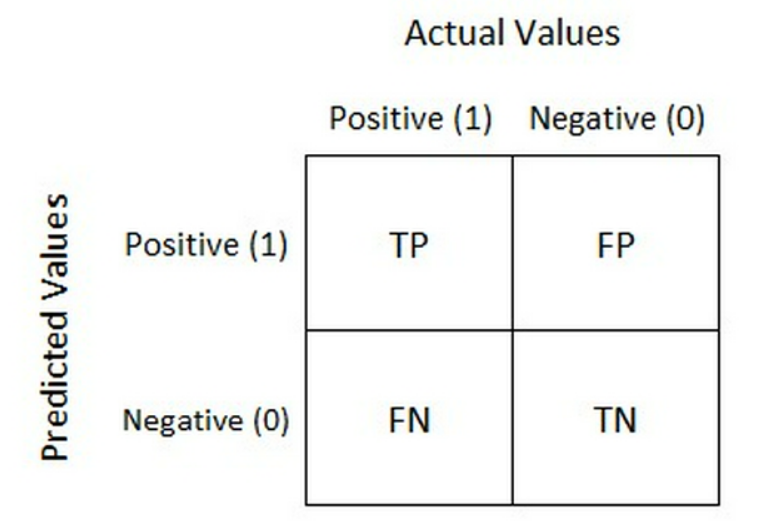

### 3.3. Ý nghĩa từng thành phần
True Positive (TP): Dự đoán đúng là Positive khi thực tế cũng là Positive.\
True Negative (TN): Dự đoán đúng là Negative khi thực tế cũng là Negative.\
False Positive (FP): Dự đoán sai là Positive khi thực tế là Negative (lỗi loại I).\
False Negative (FN): Dự đoán sai là Negative khi thực tế là Positive (lỗi loại II)\
### 3.4. Tính các chỉ số đánh giá từ ma trận nhầm lẫn
#### Độ chính xác (Accuracy): Tỷ lệ dự đoán đúng trên tổng số mẫu.
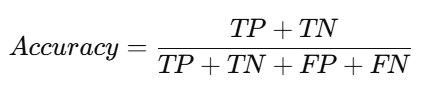
#### Độ nhạy (Recall hoặc Sensitivity): Tỷ lệ Positive thực tế được dự đoán đúng.
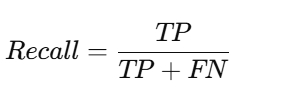\
Nếu Recall thấp, mô hình bỏ sót nhiều trường hợp dương tính (FN cao).
#### Độ đặc hiệu (Specificity): Tỷ lệ Negative thực tế được dự đoán đúng.
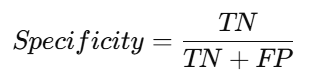
#### Độ chính xác lớp Positive (Precision): Tỷ lệ dự đoán Positive đúng trên tổng số dự đoán Positive.
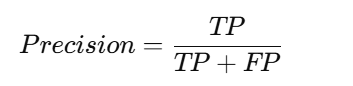\
Nếu Precision thấp, mô hình dự đoán dương quá nhiều nhưng sai nhiều (FP cao).

#### F1-Score – trung bình điều hòa giữa Precision và Recall
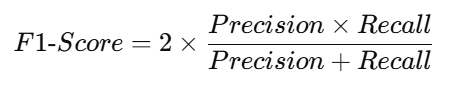\
F1-score tốt khi Precision và Recall đều cao.
### 3.5. Tại sao ma trận nhầm lẫn lại quan trọng trong các bài toán phân loại
Ma trận nhầm lẫn không chỉ cho biết mô hình đúng bao nhiêu, mà còn chỉ ra mô hình sai ở đâu. 

Ví dụ:\
Nếu FP cao, mô hình có xu hướng dự đoán nhầm Negative thành Positive (như báo động giả quá nhiều).\
Nếu FN cao, mô hình bỏ sót nhiều Positive (như không phát hiện được bệnh trong y học).